In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from statistics import mean
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import logging
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.neural_network import MLPClassifier
import time

In [2]:
import logging

# create logger with 'spam_application'
logger = logging.getLogger('spam_application')
logger.setLevel(logging.DEBUG)
# create file handler which logs even debug messages
fh = logging.FileHandler('risultati.log')
fh.setLevel(logging.INFO)
logger.addHandler(fh)


In [3]:
def addestraSVC(nomeDataset, X, y, c, gamma, kernel, dim):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro la SVC
    model = SVC(gamma = gamma, C=c, kernel = kernel)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    

    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con una SVC con uno score di {scoreStandardizzato} e iperparametri: C {c}, gamma {gamma}, kernel {kernel}, numero dimensioni {dim}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')

def addestraDecisionTreeClassifier(nomeDataset, X, y, criterio, dim):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = DecisionTreeClassifier(criterion=criterio)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un DecisionTreeClassifier con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}, criterio: {criterio}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')

def addestraRandomForestClassifier(nomeDataset, X, y, dim, n_estimators):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un RandomForestClassifier con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}, n_estimators: {n_estimators}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')

def addestraLinearDiscriminantAnalysis(nomeDataset, X, y, dim, solver):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un LinearDiscriminantAnalysis con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}, solver: {solver}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')    

def addestraMLPClassifier(nomeDataset, X, y, momentum, learning_rate, learning_rate_init, activation, dim, hidden_layer_sizes, max_iter):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)
    
    sc = StandardScaler()
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    pca = PCA(n_components=dim)
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, momentum=momentum, learning_rate=learning_rate, learning_rate_init=learning_rate_init, max_iter=max_iter, activation=activation)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)

    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} usando MLP come algoritmo di apprendimento con funzione di attivazione: {activation} iterazioni massime: {max_iter} hidden_layer_sizes: {hidden_layer_sizes} e dimensione {dim} score: {score}')
    return(f'Score: {score}')

def addestraGaussianNB(nomeDataset, X, y, dim):
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    #standardizzo i dati
    sc = StandardScaler()
    X_train_standardizzato = sc.fit_transform(X_train)
    X_test_standardizzato = sc.fit_transform(X_test)
    
    #applico la riduzione della dimensionalita'
    pca = PCA(n_components=dim)
    
    X_train_ridotto = pca.fit_transform(X_train_standardizzato)
    X_test_ridotto = pca.fit_transform(X_test_standardizzato)
    
    #addestro il DecisionTreeClassifier
    model = GaussianNB()
    model.fit(X_train_ridotto, y_train)
    
    y_pred = model.predict(X_test_ridotto)
    
    #calcolo lo score
    scoreStandardizzato = accuracy_score(y_test, y_pred)
    
    plot_confusion_matrix(y_test, y_pred)
    plt.show()
    logger.info(f'Addestrato {nomeDataset} standardizzando i dati con un GaussianNB con uno score di {scoreStandardizzato} e iperparametri: numero dimensioni {dim}')
    return(f'Lo score e stato calcolato standardizzando i dati, score: {scoreStandardizzato}')      


def trovaIperparametri(X, y, model, numero_dimensioni):
    
    start_time = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, stratify=y)

    if model == SVC:
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('SVM', SVC()), 
        ]

        pipeline = Pipeline(steps)

        valori_C = np.arange(0.1, 1.0, 0.1)
        valori_gamma = [0.1, 0.01]
        valori_kernel = ['linear', 'poly', 'rbf', 'sigmoid']

        params = { 'SVM__C': valori_C,
                  'SVM__gamma': valori_gamma,
                  'SVM__kernel': valori_kernel,
                  'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                }
    elif model == DecisionTreeClassifier:
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('tree', DecisionTreeClassifier()),
        ]
        
        pipeline= Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'tree__criterion': ['gini', 'entropy'],
                 }
    
    elif model == RandomForestClassifier:
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('random_forest', RandomForestClassifier()),
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'random_forest__n_estimators': np.arange(10, 100, 10),
                 }
    
    elif model == LinearDiscriminantAnalysis:
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('linear_discriminant_analysis', LinearDiscriminantAnalysis()),
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'linear_discriminant_analysis__solver': ['svd', 'lsqr', 'eigen'],
                  
                 }
    elif model == GaussianNB:
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('linear_discriminant_analysis', LinearDiscriminantAnalysis()),
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),

                 }
        
    elif model == MLPClassifier:  
        
        steps = [
            ('scaler', StandardScaler()),
            ('reduce_dim', PCA()),
            ('mlpClassifier', MLPClassifier()), 
        ]
        
        pipeline = Pipeline(steps)
        
        params = {'reduce_dim__n_components': np.arange(1, numero_dimensioni, 1),
                  'mlpClassifier__learning_rate': ['constant', 'invscaling', 'adaptive'],
                  'mlpClassifier__learning_rate_init' : [0.0001, 0.001, 0.01],
                  'mlpClassifier__activation' : ['relu', 'logistic'],
                  
                 }
        
    grid = GridSearchCV(pipeline, param_grid=params, cv=3)
    
    grid.fit(X_train, y_train)
    
    print("--- %s seconds ---" % (time.time() - start_time))
    return grid.best_params_

In [40]:
dfs = pd.read_excel('IncidentiModificato.xlsx', sheet_name='Foglio1', index_col=0)

In [41]:
dfs

DATA  SESSO  ANNI  PESO  ALTEZZA        BMI  Mezzo  \
VERBALE                                                            
85567   1999-10-29      0    81  84.0     1.75  27.428571      0   
85829   2000-01-14      1    69  69.0     1.62  26.291724      1   
85977   2000-03-10      1    71  67.0     1.55  27.887617      1   
86220   2000-06-14      1    54  60.0     1.59  23.733238      1   
86247   2000-06-22      1    78  69.0     1.67  24.740937      1   
...            ...    ...   ...   ...      ...        ...    ...   
101618  2019-05-08      1    82  80.2     1.62  30.559366      0   
101288E 2018-11-07      1    70  75.6     1.57  30.670615      0   
E-97586 2013-05-14      0    45  45.0     1.77  14.363689      1   
X       2018-01-03      0    54  89.6     1.68  31.746032      0   
X1      2018-02-14      1    86  50.0     1.55  20.811655      0   

         Testa:Neurocranio  Testa: Splancnocranio  Testa: Telencefalo  ...  \
VERBALE                                                                ...   
85567                    1                      0                   0  ...   
85829                    4                      4                   4  ...   
85977                    2                      0                   1  ...   
86220                    4                      0                   0  ...   
86247                    2                      0                   0  ...   
...                    ...                    ...                 ...  ...   
101618                   1                      0                   0  ...   
101288E                  2                      0                   0  ...   
E-97586                  0                      0                   0  ...   
X                        0                      2                   0  ...   
X1                       1                      1                   0  ...   

         Scheletro: Rachide cervicale  Scheletro: Rachide toracico  \
VERBALE                                                              
85567                               0                            3   
85829                               0                            0   
85977                               0                            0   
86220                               0                            0   
86247                               0                            0   
...                               ...                          ...   
101618                              0                            0   
101288E                             0                            0   
E-97586                             0                            0   
X                                   0                            0   
X1                                  0                            1   

         Scheletro: Rachide lombare  Scheletro: Bacino e sacro  \
VERBALE                                                          
85567                             0                          3   
85829                             0                          0   
85977                             0                          0   
86220                             0                          0   
86247                             0                          0   
...                             ...                        ...   
101618                            0                          0   
101288E                           0                          0   
E-97586                           0                          4   
X                                 0                          2   
X1                                0                          3   

         Scheletro: Complesso sterno/claveo/costale  Tot Testa  Tot Torace  \
VERBALE                                                                      
85567                                             3          2           0   
85829                                             4         20           7   
85977                           

In [47]:
#Dataframe con X senza Mezzo e senza la data
# y solo mezzo
X = dfs.drop('Mezzo', 1)
y = dfs['Mezzo']
X = X.drop('DATA', 1)

In [45]:
X.shape

(130, 30)

In [46]:
trovaIperparametri(model=MLPClassifier, numero_dimensioni=30, X=X, y=y)

--- 164.5145823955536 seconds ---


{'mlpClassifier__activation': 'logistic',
 'mlpClassifier__learning_rate': 'constant',
 'mlpClassifier__learning_rate_init': 0.0001,
 'reduce_dim__n_components': 4}

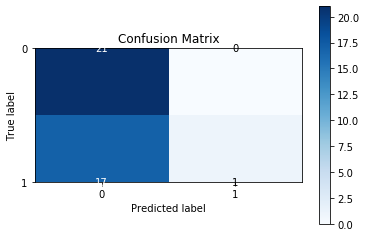

'Score: 0.5641025641025641'

In [49]:
addestraMLPClassifier(nomeDataset='Incidenti', X=X, y=y, activation='logistic', learning_rate='constant', learning_rate_init=0.0001, dim=4, max_iter=500, momentum=1, hidden_layer_sizes=(50, 50))

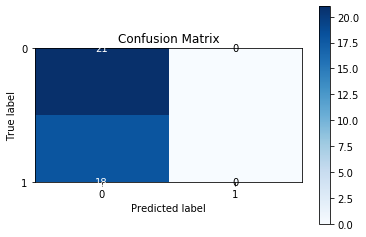

'Score: 0.5384615384615384'

In [51]:
addestraMLPClassifier(nomeDataset='Incidenti', X=X, y=y, activation='logistic', learning_rate='constant', learning_rate_init=0.0001, dim=4, max_iter=500, momentum=1, hidden_layer_sizes=(50,50, 50))